In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date
import matplotlib

# Formatting
pd.options.display.float_format = '${:,.2f}'.format
# Increase DF size
matplotlib.rc('figure', figsize=(15, 7))

In [2]:
# Files to load
raw_data = 'resources/btc.csv'

In [3]:
raw_df = pd.read_csv(raw_data)
raw_df.head()

,date,AdrActCnt,AssetEODCompletionTime,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,2009-01-03,0,1614334883,0,0,$nan,$nan,$nan,$0.00,$nan,...,$nan,$nan,$nan,$nan,$nan,$0.00,$nan,$nan,$nan,$nan
1,2009-01-04,0,1614334883,0,0,$nan,$nan,$nan,$0.00,$nan,...,$nan,$nan,$nan,$nan,$nan,$0.00,$nan,$nan,$nan,$nan
2,2009-01-05,0,1614334883,0,0,$nan,$nan,$nan,$0.00,$nan,...,$nan,$nan,$nan,$nan,$nan,$0.00,$nan,$nan,$nan,$nan
3,2009-01-06,0,1614334884,0,0,$nan,$nan,$nan,$0.00,$nan,...,$nan,$nan,$nan,$nan,$nan,$0.00,$nan,$nan,$nan,$nan
4,2009-01-07,0,1614334885,0,0,$nan,$nan,$nan,$0.00,$nan,...,$nan,$nan,$nan,$nan,$nan,$0.00,$nan,$nan,$nan,$nan


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4477 entries, 0 to 4476
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    4477 non-null   object 
 1   AdrActCnt               4477 non-null   int64  
 2   AssetEODCompletionTime  4477 non-null   int64  
 3   BlkCnt                  4477 non-null   int64  
 4   BlkSizeByte             4477 non-null   int64  
 5   BlkSizeMeanByte         4471 non-null   float64
 6   CapMVRVCur              3916 non-null   float64
 7   CapMrktCurUSD           3916 non-null   float64
 8   CapRealUSD              4477 non-null   float64
 9   DiffMean                4471 non-null   float64
 10  FeeMeanNtv              4219 non-null   float64
 11  FeeMeanUSD              3916 non-null   float64
 12  FeeMedNtv               4219 non-null   float64
 13  FeeMedUSD               3916 non-null   float64
 14  FeeTotNtv               4477 non-null   

In [5]:
# drop all those rows which 
# have any 'nan' value in it.

In [6]:
# Pull columns to for analysis

df = pd.DataFrame()
df['Date'] = raw_df['date']
df['Active_Address_Count'] = raw_df['AdrActCnt']
df['Market_Cap'] = raw_df['CapMrktCurUSD']
df.head()

,Date,Active_Address_Count,Market_Cap
0,2009-01-03,0,$nan
1,2009-01-04,0,$nan
2,2009-01-05,0,$nan
3,2009-01-06,0,$nan
4,2009-01-07,0,$nan


In [7]:
df.dropna(inplace=True)
df.head()

,Date,Active_Address_Count,Market_Cap
561,2010-07-18,860,"$295,959.15"
562,2010-07-19,929,"$279,285.20"
563,2010-07-20,936,"$259,000.40"
564,2010-07-21,784,"$275,266.47"
565,2010-07-22,594,"$203,749.57"


In [8]:
# Format 'Date' column in datetime.date format

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3916 entries, 561 to 4476
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  3916 non-null   datetime64[ns]
 1   Active_Address_Count  3916 non-null   int64         
 2   Market_Cap            3916 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 122.4 KB


In [9]:
# Set index to 'Date' column
df.set_index('Date', inplace=False)

,Active_Address_Count,Market_Cap
Date,,
2010-07-18,860,"$295,959.15"
2010-07-19,929,"$279,285.20"
2010-07-20,936,"$259,000.40"
2010-07-21,784,"$275,266.47"
2010-07-22,594,"$203,749.57"
...,...,...
2021-04-02,1103476,"$1,102,222,111,989.42"
2021-04-03,1020968,"$1,069,609,423,123.54"
2021-04-04,1032167,"$1,086,837,744,784.45"


In [10]:
# Calculating the simple moving 30 day average over time series
df['Mcap_SMA_30'] = df.Market_Cap.rolling(30, min_periods=1).mean()

# NOTE, data must be ascending (old -> new) for rolling averages to calculate correctly, 
# sort DF after calcs are complete

In [11]:
df.head(130)

,Date,Active_Address_Count,Market_Cap,Mcap_SMA_30
561,2010-07-18,860,"$295,959.15","$295,959.15"
562,2010-07-19,929,"$279,285.20","$287,622.18"
563,2010-07-20,936,"$259,000.40","$278,081.59"
564,2010-07-21,784,"$275,266.47","$277,377.81"
565,2010-07-22,594,"$203,749.57","$262,652.16"
...,...,...,...,...
686,2010-11-20,783,"$1,316,675.17","$1,004,670.48"
687,2010-11-21,768,"$1,289,461.27","$1,032,792.24"
688,2010-11-22,651,"$1,330,223.25","$1,061,944.10"
689,2010-11-23,627,"$1,322,635.63","$1,089,285.16"


In [12]:
df['ln_NV'] = np.log(df['Mcap_SMA_30'])

In [13]:
df.head()

,Date,Active_Address_Count,Market_Cap,Mcap_SMA_30,ln_NV
561,2010-07-18,860,"$295,959.15","$295,959.15",$12.60
562,2010-07-19,929,"$279,285.20","$287,622.18",$12.57
563,2010-07-20,936,"$259,000.40","$278,081.59",$12.54
564,2010-07-21,784,"$275,266.47","$277,377.81",$12.53
565,2010-07-22,594,"$203,749.57","$262,652.16",$12.48


## Metcalfe Determination, NV ~ n^2

In [14]:
# Metcalfe Determination NV ~ n^2
metcalfe_df = pd.DataFrame()

# Metcalfe Daily Active Address (DAA) calc
metcalfe_df['metcalfe_n'] = df.Active_Address_Count**2

# Metcalfe DAA SMA calc
metcalfe_df['SMA_30'] = metcalfe_df.metcalfe_n.rolling(30, min_periods=1).mean()

# Metcalfe Moving Average of ln(n^)
metcalfe_df['ln_n2'] = np.log(metcalfe_df['SMA_30'])
metcalfe_df.head()

,metcalfe_n,SMA_30,ln_n2
561,739600,"$739,600.00",$13.51
562,863041,"$801,320.50",$13.59
563,876096,"$826,245.67",$13.62
564,614656,"$773,348.25",$13.56
565,352836,"$689,245.80",$13.44


## Odlyzko Determination NV ~ n*ln(n)

In [15]:
# Odlyzko Determination NV ~ n*ln(n)
odlyzko_df = pd.DataFrame()

# Odlyzko Daily Active Address (DAA) calc
odlyzko_df['odlyzko_n'] = df.Active_Address_Count * np.log(df.Active_Address_Count)

# 30 day Simple Moving Average of Odlyzko DAA
odlyzko_df['n_SMA_30'] = odlyzko_df.odlyzko_n.rolling(30, min_periods=1).mean()

# Natural log of Odlyzko DAA 30 day SMA
odlyzko_df['ln_SMA_30'] = np.log(odlyzko_df.n_SMA_30)

# Final 30 day Simple Moving Average of Odlyzko DAA
odlyzko_df['MA_ln_SMA_30'] = odlyzko_df.ln_SMA_30.rolling(30, min_periods=1).mean()
odlyzko_df.head()

,odlyzko_n,n_SMA_30,ln_SMA_30,MA_ln_SMA_30
561,"$5,810.96","$5,810.96",$8.67,$8.67
562,"$6,348.89","$6,079.92",$8.71,$8.69
563,"$6,403.75","$6,187.87",$8.73,$8.70
564,"$5,224.90","$5,947.12",$8.69,$8.70
565,"$3,793.81","$5,516.46",$8.62,$8.68


## Clearblocks Determination NV ~ n^1.5

In [16]:
# Generalized Metcalfe Law (Clearblocks) NV ~ n^1.5
clearblocks_df = pd.DataFrame()

# Clearblocks Daily Active Address (DAA) calc
clearblocks_df['clearblocks_n'] = df.Active_Address_Count ** 1.5

# 30 day Simple Moving Average of Clearblocks DAA
clearblocks_df['SMA_30'] = clearblocks_df.clearblocks_n.rolling(30, min_periods=1).mean()

# Natural log of Clearblocks DAA 30 day SMA
clearblocks_df['ln_n'] = np.log(clearblocks_df.SMA_30)

# Final 30 day Simple Moving Average of Clearblocks DAA
clearblocks_df['MA_ln_n'] = clearblocks_df.ln_n.rolling(30, min_periods=1).mean()
clearblocks_df.head()

,clearblocks_n,SMA_30,ln_n,MA_ln_n
561,"$25,220.15","$25,220.15",$10.14,$10.14
562,"$28,315.46","$26,767.80",$10.19,$10.17
563,"$28,636.09","$27,390.57",$10.22,$10.18
564,"$21,952.00","$26,030.93",$10.17,$10.18
565,"$14,477.04","$23,720.15",$10.07,$10.16


In [57]:
# Constants for Fitting Curves
a1 = 0
b1 = 1
a2 = -3.48
b2 = 1.65

df['upperbound'] = a1 + (b1*metcalfe_df.ln_n2)
df['lowerbound'] = a2 + (b2*odlyzko_df.MA_ln_SMA_30)
df['fundamental_NAV'] = (df['upperbound'] + df['lowerbound'])/2
df.head()

,Date,Active_Address_Count,Market_Cap,Mcap_SMA_30,ln_NV,upperbound,lowerbound,fundamental_NAV
561,2010-07-18,860,"$295,959.15","$295,959.15",$12.60,$13.51,$10.82,$12.17
562,2010-07-19,929,"$279,285.20","$287,622.18",$12.57,$13.59,$10.86,$12.23
563,2010-07-20,936,"$259,000.40","$278,081.59",$12.54,$13.62,$10.88,$12.25
564,2010-07-21,784,"$275,266.47","$277,377.81",$12.53,$13.56,$10.88,$12.22
565,2010-07-22,594,"$203,749.57","$262,652.16",$12.48,$13.44,$10.85,$12.15


In [36]:
# END OF SCRIPT SORTING

# Sort DataFrame to show newest data first.
df.sort_values(by=['Date'], ascending=False)

,Date,Active_Address_Count,Market_Cap,Mcap_SMA_30,ln_NV,upperbound,lowerbound,fundamental_NAV
4476,2021-04-06,1180036,"$1,084,740,698,496.78","$1,061,959,947,680.60",$27.69,$27.90,$23.87,$25.89
4475,2021-04-05,1229289,"$1,097,233,663,848.44","$1,057,556,423,500.95",$27.69,$27.89,$23.87,$25.88
4474,2021-04-04,1032167,"$1,086,837,744,784.45","$1,051,419,742,209.50",$27.68,$27.89,$23.87,$25.88
4473,2021-04-03,1020968,"$1,069,609,423,123.54","$1,045,522,564,227.90",$27.68,$27.89,$23.87,$25.88
4472,2021-04-02,1103476,"$1,102,222,111,989.42","$1,039,994,286,374.73",$27.67,$27.89,$23.87,$25.88
...,...,...,...,...,...,...,...,...
565,2010-07-22,594,"$203,749.57","$262,652.16",$12.48,$13.44,$10.85,$12.15
564,2010-07-21,784,"$275,266.47","$277,377.81",$12.53,$13.56,$10.88,$12.22
563,2010-07-20,936,"$259,000.40","$278,081.59",$12.54,$13.62,$10.88,$12.25
562,2010-07-19,929,"$279,285.20","$287,622.18",$12.57,$13.59,$10.86,$12.23


## Plots

In [37]:
# Extract relevant fields from the DataFrame for plotting.
x_axis = df["Date"]
btc_nav = df["ln_NV"]
upperbound = df["upperbound"]
lowerbound = df["lowerbound"]
fundamental = df['fundamental_NAV']


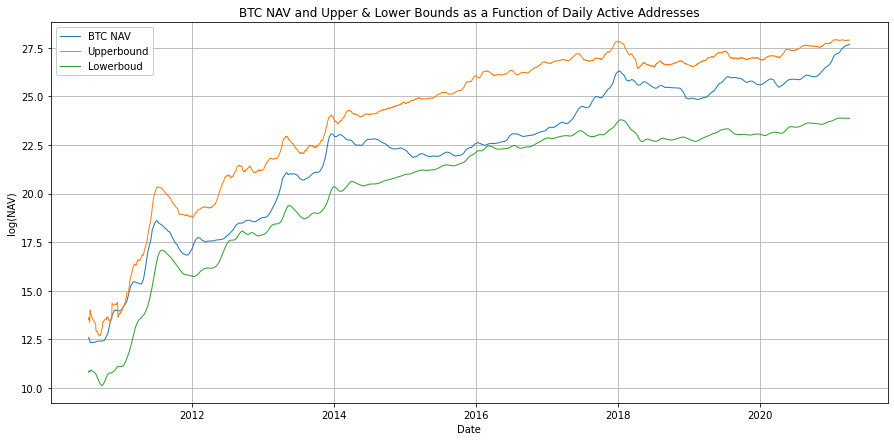

In [39]:
# BTC NAV and Upper & Lower Bounds as a Function of Daily Active Users
figure, ax1 = plt.subplots()
ax1.plot(x_axis,
         btc_nav,
         linewidth=1,
         alpha=1,
         label="BTC NAV")
ax1.plot(x_axis,
        upperbound,
        linewidth=1,
        alpha=1,
        label='Upperbound')
ax1.plot(x_axis,
        lowerbound,
        linewidth=1,
        alpha=1,
        label='Lowerboud')

# Incorporate the other graph properties.
plt.title('BTC NAV and Upper & Lower Bounds as a Function of Daily Active Addresses')
plt.ylabel("log(NAV)")
plt.xlabel("Date")
plt.grid(True)
plt.legend(framealpha=1, frameon=True)
# Save the figure.
plt.savefig("resources/Fig1.png")

# Show plot.
plt.show()

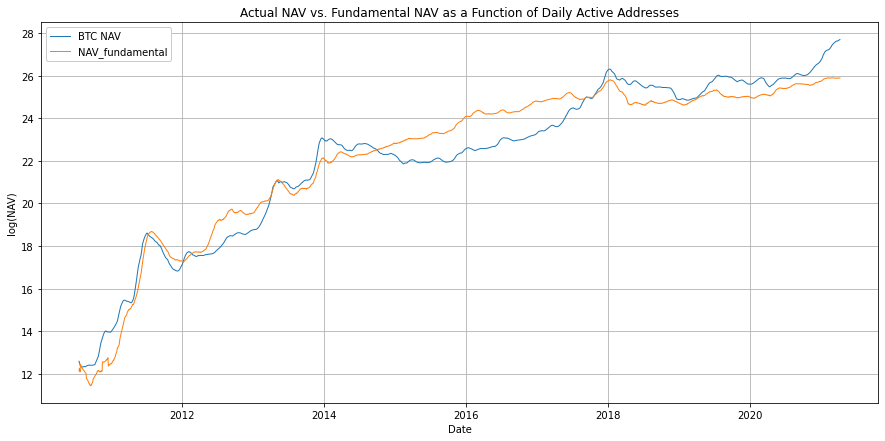

In [40]:
# Actual vs. Fundamental NAV
figure, ax2 = plt.subplots()
ax2.plot(x_axis,
         btc_nav,
         linewidth=1,
         alpha=1,
         label="BTC NAV")
ax2.plot(x_axis,
        fundamental,
        linewidth=1,
        alpha=1,
        label='NAV_fundamental')

# Incorporate the other graph properties.
plt.title('Actual NAV vs. Fundamental NAV as a Function of Daily Active Addresses')
plt.ylabel("log(NAV)")
plt.xlabel("Date")
plt.grid(True)
plt.legend(framealpha=1, frameon=True)
# Save the figure.
plt.savefig("resources/Fig2.png")

# Show plot.
plt.show()

## Calculating Correlation between BTC NAV and Variations of Metcalfe's Law

In [41]:
# Extract relevant fields from the DataFrame for calc.
btc_nav = df["ln_NV"]
metcalfe = metcalfe_df['ln_n2']
clearblocks = clearblocks_df['ln_n']
odlyzko = odlyzko_df['ln_SMA_30']


In [90]:
# Calculating Correlation for BTC NAV and Metcalfe NV ~ n2
metcalfe_correlation = btc_nav.corr(metcalfe).round(decimals=4)
metcalfe_correlation

# Calculating Correlation for BTC NAV and Gernalized Metcalfe NV ~ n1.5
gen_metcalfe_correlation = btc_nav.corr(clearblocks).round(decimals=4)
gen_metcalfe_correlation

# Calculating Correlation for BTC NAV and Odlyzko NV ~ n*ln(n)
odlyzko_correlation = btc_nav.corr(odlyzko).round(decimals=4)
odlyzko_correlation

print(
    f'BTC-Metcalfe(NAV~n2) correlation: {metcalfe_correlation}'\
    f'\nBTC-Generalized Metcalfe(NAV~n1.5) correlation: {gen_metcalfe_correlation}'\
    f'\nBTC-Odlyzko(NAV~n*ln(n)) correlation: {odlyzko_correlation}'
     )

BTC-Metcalfe(NAV~n2) correlation: 0.9705
BTC-Generalized Metcalfe(NAV~n1.5) correlation: 0.9702
BTC-Odlyzko(NAV~n*ln(n)) correlation: 0.9692
